# Lille Metropole Dataset - Air Quality

https://fr.wikipedia.org/wiki/Indice_de_qualit%C3%A9_de_l%27air

Le nouvel indice de qualité de l’air ATMO est un indicateur journalier gradué de 1 (bon) à 6 (extrêmement mauvais) qui permet de caractériser de manière simple et globale la qualité de l’air d’une agglomération urbaine.

Il se compose de 5 sous-indices, chacun étant représentatif d'un polluant de l'air :
- dioxyde d'azote (NO2 ou code_no2)
- dioxyde de soufre (SO2 ou code_so2)
- ozone (O3 ou code_o3)
- particules fines de moins de 10mm (PM10 ou code_pm10)
- particules fines de moins de 2.5mm (PM2.5 ou code_pm25)

Le sous-indice le plus élevé détermine l'indice du jour.

Il est calculé à partir des mesures des stations représentatives de la pollution de fond. Il ne prend pas en compte les phénomènes de proximité (automobile ou industriel).

| O3         | SO2       | NO2       | PM10      | PM2.5   | Niveau              |
|------------|-----------|-----------|-----------|---------|---------------------|
| 0 à 50     | 0 à 100   | 0 à 40    | 0 à 20    | 0 à 10  | Bon                 |
| 50 à 100   | 100 à 200 | 40 à 90   | 20 à 40   | 10 à 20 | Moyen               |
| 100 à 130  | 200 à 350 | 90 à 120  | 40 à 50   | 20 à 25 | Dégradé             |
| 130 à 240  | 350 à 500 | 120 à 230 | 50 à 100  | 25 à 50 | Mauvais             |
| 240 à 380  | 500 à 750 | 230 à 340 | 100 à 150 | 50 à 75 | Très mauvais        |
| > 380      | > 750     | > 340     | > 150     | > 75    | Extrêmement mauvais |	 	 	 	 	

## 1. Setting-Up

#### 1.1 Importing librairies & modules

In [221]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cycler import cycler # used in the plot customization part 
import seaborn as sns
import requests
import os
import time # provides various time-related functions
from datetime import datetime
#import geopandas as gpd
# from arcgis.features import FeatureLayer

#### 1.2. Creating the relevant folders and paths

In [224]:
# Defining current folder as our main directory
dirname = os.getcwd()

#Getting current date
datestr = time.strftime("%Y-%m-%d")

# location folders variables
data_in = dirname + "\\da_data_raw\\" + datestr + "\\"
data_out = dirname + "\\da_data_workfiles\\" + datestr + "\\"

# checking if data_in path is not present, then create it.
if not os.path.exists(data_in):
    os.makedirs(data_in)
    print(f"Directory Created: {data_in}")
    
# checking if data_out path is not present then create it.
if not os.path.exists(data_out):
    os.makedirs(data_out)
    print(f"Directory Created: {data_out}")
    
# printing the results as 
print(f"\nMain directory: {dirname}")
print(f"Raw data folder: {data_in}")
print(f"Workfile folder: {data_out}")


Main directory: c:\Users\33671\Documents\Python\MEL_air-quality
Raw data folder: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_raw\2022-10-20\
Workfile folder: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_workfiles\2022-10-20\


#### 1.3 Verifying the api response

In [225]:
dataset_id = "indice-qualite-de-lair"
format = "json"
limit = "10"
r = requests.get(f"https://opendata.lillemetropole.fr/api/v2/catalog/datasets/{dataset_id}/exports/{format}?limit={limit}", 
                 timeout=2)

print(f"URL: {r.url}")
print(f"HTTP Response Status Code: {r.status_code}") 
print(f"HTTP Error: {r.raise_for_status()}")
print(f"Encoding: {r.encoding}")
print(f"Header content type: {r.headers.get('content-type')}")
print(f"Cookies: {r.cookies}")

r.close()

URL: https://opendata.lillemetropole.fr/api/v2/catalog/datasets/indice-qualite-de-lair/exports/json?limit=10
HTTP Response Status Code: 200
HTTP Error: None
Encoding: utf-8
Header content type: application/json; charset=utf-8
Cookies: <RequestsCookieJar[]>


#### 1.4 Data Collection

In [226]:
dataset_id = "indice-qualite-de-lair"
format = "json"
limit = "-1" # argument to pass to get the full dataset 
df_raw = pd.read_json(f"https://opendata.lillemetropole.fr/api/v2/catalog/datasets/{dataset_id}/exports/{format}?limit={limit}")

#### 1.5 Getting a first feel of the data

In [227]:
df_raw.head()

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
0,2022-07-31T02:00:00+00:00,2,Moyen,#50CCAA,2022-08-01T14:10:07+00:00,Atmo HDF,commune,59368,MADELEINE,1,...,1,3.06997,50.65441,704956,7061946,2154,796480,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.06997, 'lat': 50.65441}",59110
1,2022-07-31T02:00:00+00:00,2,Moyen,#50CCAA,2022-08-01T14:10:07+00:00,Atmo HDF,commune,59371,MAISNIL,1,...,1,2.87700,50.61799,691280,7057892,2154,796483,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.877, 'lat': 50.61798999999999}",59134
2,2022-07-31T02:00:00+00:00,2,Moyen,#50CCAA,2022-08-01T14:10:07+00:00,Atmo HDF,commune,59421,MOUVAUX,1,...,1,3.13669,50.70408,709673,7067487,2154,796528,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.13669, 'lat': 50.70408}",59420
3,2022-07-31T02:00:00+00:00,2,Moyen,#50CCAA,2022-08-01T14:10:07+00:00,Atmo HDF,commune,59482,QUESNOY SUR DEULE,1,...,1,3.00715,50.71302,700506,7068475,2154,796588,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.00715, 'lat': 50.71301999999999}",59890
4,2022-07-31T02:00:00+00:00,2,Moyen,#50CCAA,2022-08-01T14:10:07+00:00,Atmo HDF,commune,59598,TOUFFLERS,1,...,1,3.23260,50.66078,716475,7062678,2154,796701,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.2326, 'lat': 50.66078}",59390


In [228]:
df_raw.tail()

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
27735,2022-09-16T02:00:00+00:00,2,Moyen,#50CCAA,2022-09-17T14:10:07+00:00,Atmo HDF,commune,59386,MARQUETTE LEZ LILLE,1,...,1,3.05917,50.67413,704190,7064143,2154,974578,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.059169999999999, 'lat': 50.67413}",59520
27736,2022-09-16T02:00:00+00:00,2,Moyen,#50CCAA,2022-09-17T14:10:07+00:00,Atmo HDF,commune,59508,RONCQ,1,...,1,3.11782,50.74729,708331,7072300,2154,974697,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.11782, 'lat': 50.74729}",59223
27737,2022-09-16T02:00:00+00:00,2,Moyen,#50CCAA,2022-09-17T14:10:07+00:00,Atmo HDF,commune,59523,SAINGHIN EN MELANTOIS,2,...,1,3.16328,50.58779,711582,7054532,2154,974711,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.16328, 'lat': 50.58779}",59262
27738,2022-09-16T02:00:00+00:00,2,Moyen,#50CCAA,2022-09-17T14:10:07+00:00,Atmo HDF,commune,59527,SAINT ANDRE LEZ LILLE,1,...,1,3.04728,50.66040,703349,7062612,2154,974715,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.04728, 'lat': 50.660399999999996}",59350
27739,2022-09-16T02:00:00+00:00,2,Moyen,#50CCAA,2022-09-17T14:10:07+00:00,Atmo HDF,commune,59550,SALOME,1,...,1,2.83653,50.53596,688392,7048758,2154,974737,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.836529999999999, 'lat': 50.535959999...",59496


In [229]:
df_raw.sample(5)

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
2482,2022-02-21T01:00:00+00:00,2,Moyen,#50CCAA,2022-02-22T14:10:08+00:00,Atmo HDF,commune,59653,WAVRIN,1,...,1,2.93309,50.57252,695252,7052821,2154,190881,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.93309, 'lat': 50.572520000000004}",59136
20667,2022-09-13T02:00:00+00:00,2,Moyen,#50CCAA,2022-09-14T14:10:07+00:00,Atmo HDF,commune,59328,LAMBERSART,2,...,2,3.02533,50.65209,701794,7061685,2154,963158,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.02533, 'lat': 50.652089999999994}",59130
9128,2022-04-12T02:00:00+00:00,2,Moyen,#50CCAA,2022-04-13T14:10:06+00:00,Atmo HDF,commune,59202,ERQUINGHEM LYS,1,...,2,2.84054,50.67035,688707,7063731,2154,372319,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.84054, 'lat': 50.670349999999985}",59193
9944,2022-08-26T02:00:00+00:00,2,Moyen,#50CCAA,2022-08-27T14:10:07+00:00,Atmo HDF,commune,59281,HANTAY,1,...,1,2.86854,50.53797,690665,7048977,2154,894910,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.8685400000000003, 'lat': 50.53796999...",59480
19017,2022-07-18T02:00:00+00:00,4,Mauvais,#FF5050,2022-07-19T14:10:06+00:00,Atmo HDF,commune,59332,LANNOY,1,...,2,3.21030,50.66620,714893,7063278,2154,747189,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.2103, 'lat': 50.6662}",59390


#### 1.6 Exporting raw data to CSV

In [230]:
# generating a raw csv file with timestamp included in the name
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = "air-quality-index_" + timestr + ".csv"
print(f"file name: {file_name}")

df_raw.to_csv(data_in + file_name, index = False)

file name: air-quality-index_2022-10-20_17-06-10.csv


## 2. Preparing Data for Analysis

#### 2.1 Basic exploration

In [231]:
# data.info has the merits of combining many functions together
# - see if there's null values replacing `df.isnull().sum()`
# - see the dtype of each colymns replacing `df.dtypes`
# - see the shape of the dataframe replacing `df.shape`
# - estimating the memory usage replacing `df.memory_usage`
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27740 entries, 0 to 27739
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_ech      27740 non-null  object 
 1   code_qual     27740 non-null  int64  
 2   lib_qual      27740 non-null  object 
 3   coul_qual     27740 non-null  object 
 4   date_dif      27740 non-null  object 
 5   source        27740 non-null  object 
 6   type_zone     27740 non-null  object 
 7   code_zone     27740 non-null  int64  
 8   lib_zone      27740 non-null  object 
 9   code_no2      27740 non-null  int64  
 10  code_so2      27740 non-null  int64  
 11  code_o3       27740 non-null  int64  
 12  code_pm10     27740 non-null  int64  
 13  code_pm25     27740 non-null  int64  
 14  x_wgs84       27740 non-null  float64
 15  y_wgs84       27740 non-null  float64
 16  x_reg         27740 non-null  int64  
 17  y_reg         27740 non-null  int64  
 18  epsg_reg      27740 non-nu

In [232]:
# quick overview of date_ech to see the formatting used
df_raw["date_ech"].value_counts(ascending=True)

2022-07-31T02:00:00+00:00     95
2022-04-13T02:00:00+00:00     95
2022-04-14T02:00:00+00:00     95
2022-04-15T02:00:00+00:00     95
2022-04-16T02:00:00+00:00     95
                            ... 
2022-01-15T01:00:00+00:00     95
2022-07-30T02:00:00+00:00     95
2022-07-03T02:00:00+00:00    190
2022-07-04T02:00:00+00:00    190
2022-07-05T02:00:00+00:00    190
Name: date_ech, Length: 289, dtype: int64

In [233]:
# quick overview of date_dif to see the formatting used
df_raw["date_dif"].value_counts(ascending=True)

2022-08-01T14:10:07+00:00     95
2022-04-15T14:10:06+00:00     95
2022-04-16T14:10:07+00:00     95
2022-04-17T14:10:07+00:00     95
2022-04-18T14:10:06+00:00     95
                            ... 
2022-01-18T14:10:08+00:00     95
2022-07-04T14:10:08+00:00    190
2022-07-05T14:10:08+00:00    190
2022-07-06T14:10:08+00:00    190
2022-10-19T14:10:07+00:00    285
Name: date_dif, Length: 287, dtype: int64

In [234]:
# checking how many unique "lib_zone" (i.e. cities) we observe each day in this dataframe
df_raw["lib_zone"].nunique()

95

In [235]:
df_raw["lib_zone"].value_counts(ascending=True)

MADELEINE              292
NOYELLES LES SECLIN    292
LILLE                  292
FROMELLES              292
FOURNES EN WEPPES      292
                      ... 
BASSEE                 292
WICRES                 292
SANTES                 292
RADINGHEM EN WEPPES    292
CAPINGHEM              292
Name: lib_zone, Length: 95, dtype: int64

In [236]:
# creating a copy of the dataframe
df = df_raw.copy()

#### 2.2 Dealing with duplicates

When I started this project, I was getting duplicates (days with 190 occurences of the same date instead of 95). However, it's not the case anymore. I'm still keeping this **2.2 Duplicates** section in case it happens again when we query the API in the future. 

Performing a `df.duplicated().sum()` gives me a *TypeError: unhashable type: 'dict'* error. This is because columns **geo_shape** and **geo_point_2d** are dictionaries. I'll exclude them. 

In [237]:
# check duplication of df excluding geo_shape and geo_point_2d
df.duplicated(df.columns.difference(['geo_shape', 'geo_point_2d'])).sum()

0

I found this **0** result to be strange given my initial observations with dates **value_counts** and decided to proceed further by including columns one by one to see if duplicates emerge

In [238]:
#I used to get 817 duplicates but not anymore. Keeping the code just in case it happens again. 
df.duplicated(['date_ech', 'date_dif', 'code_zone', 'lib_zone', 'code_qual', 'lib_qual', 'coul_qual', 
               'source', 'type_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 
               'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg']).sum()

285

In [239]:
df.duplicated(['date_ech', 'date_dif', 'code_zone', 'lib_zone', 'code_qual', 'lib_qual', 'coul_qual', 
               'source', 'type_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 'x_wgs84', 
               'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'objectid']).sum()

0

There are (were) numerous duplicates if we ignore **objectid**. Since all other variables are similar and we expect one observation per day per city, I will remove **objectid**, then remove duplicates. 

In [240]:
# removeing objectid column
df.drop(columns=['objectid'], inplace=True)

# converting **geo_shape** and **geo_point_2d** to string
df['geo_shape'] = df.geo_shape.astype(str)
df['geo_point_2d'] = df.geo_point_2d.astype(str)

In [241]:
df.duplicated().sum()

285

In [242]:
df.drop_duplicates(inplace=True)

#### 2.3 Removing and rearranging columns

In [243]:
# Removing
df.drop(columns=['coul_qual', 'date_dif', 'source', 'type_zone', 'code_zone', 'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'geo_shape', 'geo_point_2d'], 
        errors='ignore', 
        inplace=True)

df.head()

,date_ech,code_qual,lib_qual,lib_zone,code_no2,code_so2,code_o3,code_pm10,code_pm25,code_posta
0,2022-07-31T02:00:00+00:00,2,Moyen,MADELEINE,1,1,2,1,1,59110
1,2022-07-31T02:00:00+00:00,2,Moyen,MAISNIL,1,1,2,1,1,59134
2,2022-07-31T02:00:00+00:00,2,Moyen,MOUVAUX,1,1,2,1,1,59420
3,2022-07-31T02:00:00+00:00,2,Moyen,QUESNOY SUR DEULE,1,1,2,1,1,59890
4,2022-07-31T02:00:00+00:00,2,Moyen,TOUFFLERS,1,1,2,1,1,59390


In [244]:
# Renaming columns
cols = ['date', 'quality_code', 'quality_label', 'city', 'no2', 'so2', 'o3', 'pm10', 'pm2-5', 'zip_code']
df.columns = cols

df.head()

,date,quality_code,quality_label,city,no2,so2,o3,pm10,pm2-5,zip_code
0,2022-07-31T02:00:00+00:00,2,Moyen,MADELEINE,1,1,2,1,1,59110
1,2022-07-31T02:00:00+00:00,2,Moyen,MAISNIL,1,1,2,1,1,59134
2,2022-07-31T02:00:00+00:00,2,Moyen,MOUVAUX,1,1,2,1,1,59420
3,2022-07-31T02:00:00+00:00,2,Moyen,QUESNOY SUR DEULE,1,1,2,1,1,59890
4,2022-07-31T02:00:00+00:00,2,Moyen,TOUFFLERS,1,1,2,1,1,59390


In [245]:
# Moving columns
city = df.pop('city')
df.insert(1, 'city', city)
del city

zip_code = df.pop('zip_code')
df.insert(2, 'zip_code', zip_code)
del zip_code

quality_label = df.pop('quality_label')
df.insert(3, 'quality_label', quality_label)
del quality_label

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5
0,2022-07-31T02:00:00+00:00,MADELEINE,59110,Moyen,2,1,1,2,1,1
1,2022-07-31T02:00:00+00:00,MAISNIL,59134,Moyen,2,1,1,2,1,1
2,2022-07-31T02:00:00+00:00,MOUVAUX,59420,Moyen,2,1,1,2,1,1
3,2022-07-31T02:00:00+00:00,QUESNOY SUR DEULE,59890,Moyen,2,1,1,2,1,1
4,2022-07-31T02:00:00+00:00,TOUFFLERS,59390,Moyen,2,1,1,2,1,1


#### 2.4 Conversions

In [246]:
# lower cases
df['quality_label'] = df['quality_label'].str.lower()
df['city'] = df['city'].str.lower()

In [247]:
df.dtypes

date             object
city             object
zip_code          int64
quality_label    object
quality_code      int64
no2               int64
so2               int64
o3                int64
pm10              int64
pm2-5             int64
dtype: object

In [248]:
#convert date 
df['date'] = pd.to_datetime(df['date']).dt.date
df["date"] = pd.to_datetime(df["date"]).dt.normalize() 

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5
0,2022-07-31,madeleine,59110,moyen,2,1,1,2,1,1
1,2022-07-31,maisnil,59134,moyen,2,1,1,2,1,1
2,2022-07-31,mouvaux,59420,moyen,2,1,1,2,1,1
3,2022-07-31,quesnoy sur deule,59890,moyen,2,1,1,2,1,1
4,2022-07-31,toufflers,59390,moyen,2,1,1,2,1,1


In [249]:
df.dtypes

date             datetime64[ns]
city                     object
zip_code                  int64
quality_label            object
quality_code              int64
no2                       int64
so2                       int64
o3                        int64
pm10                      int64
pm2-5                     int64
dtype: object

#### 2.5 Enriching data

To facilitate data manipulation later on, let's add some usefull date related columns

In [250]:
#using index since date column is my index
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday #The day of the week with Monday=0, Sunday=6.
df['week_of_year'] = df.date.dt.isocalendar().week

#sorting  by date then city
df.sort_values(by=['date', 'city'], inplace=True)

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5,year,month,day,weekday,week_of_year
8155,2022-01-01,allennes les marais,59251,moyen,2,1,1,2,2,2,2022,1,1,5,52
11391,2022-01-01,annoeullin,59112,moyen,2,1,1,2,2,2,2022,1,1,5,52
11997,2022-01-01,anstaing,59152,moyen,2,2,1,2,2,2,2022,1,1,5,52
1517,2022-01-01,armentieres,59280,moyen,2,1,1,2,2,2,2022,1,1,5,52
11392,2022-01-01,aubers,59249,moyen,2,1,1,2,2,2,2022,1,1,5,52


#### 2.6 Multi-indexing

In [251]:
# multi-index dataframe
df = df.set_index(['city', 'date']).sort_index()
df

zip_code quality_label  quality_code  no2  \
city                date                                                    
allennes les marais 2022-01-01     59251         moyen             2    1   
                    2022-01-02     59251         moyen             2    1   
                    2022-01-03     59251         moyen             2    1   
                    2022-01-04     59251         moyen             2    1   
                    2022-01-05     59251         moyen             2    1   
...                                  ...           ...           ...  ...   
willems             2022-10-16     59780         moyen             2    1   
                    2022-10-17     59780           bon             1    1   
                    2022-10-18     59780         moyen             2    1   
                    2022-10-19     59780         moyen             2    1   
                    2022-10-20     59780         moyen             2    1   

                                so2  o3  pm10  pm2-5  year  month  day  \
city                date                                                 
allennes les marais 2022-01-01    1   2     2      2  2022      1    1   
                    2022-01-02    1   2     2      2  2022      1    2   
                    2022-01-03    1   2     1      1  2022      1    3   
                    2022-01-04    1   2     1      1  2022      1    4   
                    2022-01-05    1   2     1      1  2022      1    5   
...                             ...  ..   ...    ...   ...    ...  ...   
willems             2022-10-16    1   2     1      1  2022     10   16   
                    2022-10-17    1   1     1      1  2022     10   17   
                    2022-10-18    1   2     2      2  2022     10   18   
                    2022-10-19    1   2     1      2  2022     10   19   
                    2022-10-20    1   2     1      1  2022     10   20   

                                weekday  week_of_year  
city                date                               
allennes les marais 2022-01-01        5            52  
                    2022-01-02        6            52  
                    2022-01-03        0             1  
                    2022-01-04        1             1  
                    2022-01-05        2             1  
...                                 ...           ...  
willems             2022-10-16        6            41  
                    2022-10-17        0            42  
                    2022-10-18        1            42  
                    2022-10-19        2            42  
                    2022-10-20        3            42  

[27455 rows x 13 columns]

In [252]:
# single index dataframe just in case
df_unstacked = df.unstack(level='city')
df_unstacked.drop('zip_code', axis=1, inplace=True)
df_unstacked

quality_label                                         \
city       allennes les marais annoeullin anstaing armentieres aubers   
date                                                                    
2022-01-01               moyen      moyen    moyen       moyen  moyen   
2022-01-02               moyen      moyen    moyen       moyen  moyen   
2022-01-03               moyen      moyen    moyen       moyen  moyen   
2022-01-04               moyen      moyen    moyen       moyen  moyen   
2022-01-05               moyen      moyen    moyen       moyen  moyen   
...                        ...        ...      ...         ...    ...   
2022-10-16               moyen      moyen    moyen       moyen  moyen   
2022-10-17                 bon        bon      bon       moyen  moyen   
2022-10-18               moyen      moyen    moyen       moyen  moyen   
2022-10-19               moyen      moyen    moyen       moyen  moyen   
2022-10-20               moyen      moyen    moyen       moyen  moyen   

                                                                ...  \
city       baisieux bassee bauvin beaucamps ligny bois grenier  ...   
date                                                            ...   
2022-01-01    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-02    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-03    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-04    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-05    moyen  moyen  moyen           moyen        moyen  ...   
...             ...    ...    ...             ...          ...  ...   
2022-10-16    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-17      bon  moyen    bon           moyen        moyen  ...   
2022-10-18    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-19    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-20    moyen  moyen  moyen           moyen        moyen  ...   

                week_of_year                                            \
city       villeneuve d ascq wambrechies warneton wasquehal wattignies   
date                                                                     
2022-01-01                52          52       52        52         52   
2022-01-02                52          52       52        52         52   
2022-01-03                 1           1        1         1          1   
2022-01-04                 1           1        1         1          1   
2022-01-05                 1           1        1         1          1   
...                      ...         ...      ...       ...        ...   
2022-10-16                41          41       41        41         41   
2022-10-17                42          42       42        42         42   
2022-10-18                42          42       42        42         42   
2022-10-19                42          42       42        42         42   
2022-10-20                42          42       42        42         42   

                                                        
city       wattrelos wavrin wervicq sud wicres willems  
date                                                    
2022-01-01        52     52          52     52      52  
2022-01-02        52     52          52     52      52  
2022-01-03         1      1           1      1       1  
2022-01-04         1      1           1      1       1  
2022-01-05         1      1           1      1       1  
...              ...    ...         ...    ...     ...  
2022-10-16        41     41          41     41      41  
2022-10-17        42     42          42     42      42  
2022-10-18        42     42          42     42      42  
2022-10-19        42     42          42     42      42  
2022-10-20        42     42          42     42      42  

[289 rows x 1140 columns]

#### 2.7 Exporting df to CSV

In [253]:
# generating a subset csv workfile with timestamp including in the name
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = "!all_air-quality-index_" + timestr + ".csv"
print(f"file name: {file_name}")

df.to_csv(data_out + file_name, index = True)

file name: !all_air-quality-index_2022-10-20_17-09-05.csv


In [254]:
# generating a csv workfile specific to each city
for city, df_city in df.groupby('city'):
    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
    file_name = city + "_air-quality-index_" + timestr + ".csv"
    df_city.to_csv(data_out + file_name, index = True)

## 3. Data Analysis & Visualization

#### 3.1 Extracting some key figures

Distribution of the air quality index

In [275]:
# air quality overview
sorter = ['très mauvais', 'mauvais', 'dégradé', 'moyen', 'bon']

counts = df['quality_label'].value_counts()
percent = df['quality_label'].value_counts(normalize=True)
percent100 = df['quality_label'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'counts': counts, 'percentage': percent100}).reindex(sorter)

,counts,percentage
très mauvais,46,0.2%
mauvais,3195,11.6%
dégradé,4576,16.7%
moyen,19472,70.9%
bon,166,0.6%


In [276]:
# safety check to see if quality_codes match quality-labels
df['quality_code'].value_counts(normalize=True)

2    0.709233
3    0.166673
4    0.116372
1    0.006046
5    0.001675
Name: quality_code, dtype: float64

Best and worst cities of the agglomeration

In [305]:
# Based on number of days of Poor to Very Poor air quality index
poor_air_quality_days = df[df['quality_code'] >= 4]['quality_code'].groupby('city').agg('count').sort_values()
poor_air_quality_days = poor_air_quality_days.reset_index()
poor_air_quality_days.columns = ['city', 'poor-air-quality-days']
poor_air_quality_days

,city,poor-air-quality-days
0,peronne en melantois,30
1,wicres,31
2,loos,31
3,bouvines,31
4,herlies,31
...,...,...
90,bondues,38
91,neuville en ferrain,38
92,wambrechies,38
93,halluin,39


In [ ]:
days_observed = len(df_unstacked)
days_observed

[Text(0.5, 0, 'Days of poor to very poor air quality'), Text(0, 0.5, '')]

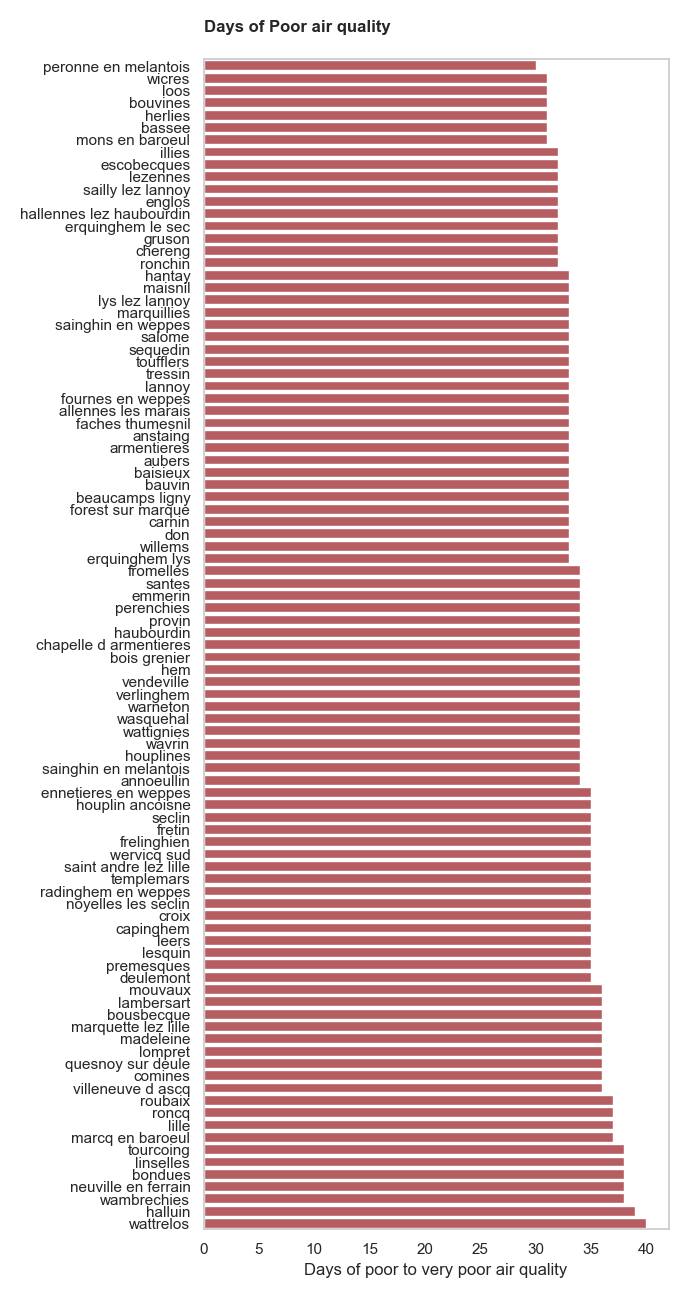

In [325]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(y='city', x='poor-air-quality-days', data=poor_air_quality_days, color='r')

# Add a legend and informative axis label
ax.set_title("Days of Poor air quality")
ax.set(xlabel="Days of poor to very poor air quality",
       ylabel='')

In [291]:
# Based on average quality_code (big is bad)
df['quality_code'].groupby('city').agg('mean').sort_values()

city
herlies              2.373702
wicres               2.373702
fournes en weppes    2.380623
don                  2.380623
hantay               2.380623
                       ...   
tourcoing            2.432526
halluin              2.435986
roubaix              2.439446
villeneuve d ascq    2.442907
wattrelos            2.449827
Name: quality_code, Length: 95, dtype: float64

#### 3.2 Evolution of each polluant measurement in each city versus the agglomeration

In [ ]:
df.loc[('lille'), ('no2')].index

In [ ]:
# Create all plots
fig, axs = plt.subplots(5, 1, figsize=(8, 12))
axs[0].plot(df.loc[('lille'), ('no2')].rolling(window=5).mean(), color='C0')
axs[0].plot(df.loc[(slice(None),),('no2')].groupby('date').agg('mean').rolling(window=5).mean(), color='C0', linewidth=1, linestyle=':')
axs[1].plot(df.loc[('lille'), ('so2')].rolling(window=5).mean(), color='C1')
axs[1].plot(df.loc[(slice(None),),('so2')].groupby('date').agg('mean').rolling(window=5).mean(), color='C1', linewidth=1, linestyle=':')
axs[2].plot(df.loc[('lille'), ('o3')].rolling(window=5).mean(), color='C2')
axs[2].plot(df.loc[(slice(None),),('o3')].groupby('date').agg('mean').rolling(window=5).mean(), color='C2', linewidth=1, linestyle=':')
axs[3].plot(df.loc[('lille'), ('pm10')].rolling(window=5).mean(), color='C3')
axs[3].plot(df.loc[(slice(None),),('pm10')].groupby('date').agg('mean').rolling(window=5).mean(), color='C3', linewidth=1, linestyle=':')
axs[4].plot(df.loc[('lille'), ('pm2-5')].rolling(window=5).mean(), color='C4')
axs[4].plot(df.loc[(slice(None),),('pm2-5')].groupby('date').agg('mean').rolling(window=5).mean(), color='C4', linewidth=1, linestyle=':')

# Format all plots
for ax in axs:
        ax.set_ylim(bottom=0, top=5)
        ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Main title
axs[0].set_title("Lille - Air polluant indexes vs agglomeration", pad=30)

# legends
axs[0].legend(['Nitrogen dioxide (no2)', 'Nitrogen dioxide MEL average'])
axs[1].legend(['Sulfur dioxide (so2)', 'Sulfur dioxide MEL average'])
axs[2].legend(['Ozone (o3)', 'Ozone MEL average'])
axs[3].legend(['Particulate Matter (pm10)', 'Particulate Matter MEL average'])
axs[4].legend(['Particulate Matter (pm2.5)', 'Particulate Matter MEL average'])

# Subtitle
axs[0].text(x=.125, y=.89, 
        s="5 days rolling average of Nitrogen dioxide sub-Index based on European Air Quality Index (EAQI) standars versus \nthe average of the 95 cities that make up the Lille agglomeration.", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)

# Source text
axs[4].text(x=.08, y=0.06, 
        s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)

In [ ]:
# Generating a set of cities
index_list = list(df.index.values)

set_city = set()
for i in index_list:
    set_city.add(i[0])

In [ ]:
created_files = 0

for i in set_city:
        # Create all plots
        fig, axs = plt.subplots(5, 1, figsize=(8, 12))
        axs[0].plot(df.loc[(i), ('no2')].rolling(window=5).mean(), color='C0')
        axs[0].plot(df.loc[(slice(None),),('no2')].groupby('date').agg('mean').rolling(window=5).mean(), color='C0', linewidth=1, linestyle=':')
        axs[1].plot(df.loc[(i), ('so2')].rolling(window=5).mean(), color='C1')
        axs[1].plot(df.loc[(slice(None),),('so2')].groupby('date').agg('mean').rolling(window=5).mean(), color='C1', linewidth=1, linestyle=':')
        axs[2].plot(df.loc[(i), ('o3')].rolling(window=5).mean(), color='C2')
        axs[2].plot(df.loc[(slice(None),),('o3')].groupby('date').agg('mean').rolling(window=5).mean(), color='C2', linewidth=1, linestyle=':')
        axs[3].plot(df.loc[(i), ('pm10')].rolling(window=5).mean(), color='C3')
        axs[3].plot(df.loc[(slice(None),),('pm10')].groupby('date').agg('mean').rolling(window=5).mean(), color='C3', linewidth=1, linestyle=':')
        axs[4].plot(df.loc[(i), ('pm2-5')].rolling(window=5).mean(), color='C4')
        axs[4].plot(df.loc[(slice(None),),('pm2-5')].groupby('date').agg('mean').rolling(window=5).mean(), color='C4', linewidth=1, linestyle=':')

        # Format all plots
        for ax in axs:
                ax.set_ylim(bottom=0, top=5)
                ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

        # Main title
        axs[0].set_title(str(i).capitalize() + " - Air polluants vs agglomeration average", pad=30)

        # legends
        axs[0].legend(['Nitrogen dioxide (no2)', 'Nitrogen dioxide MEL average'])
        axs[1].legend(['Sulfur dioxide (so2)', 'Sulfur dioxide MEL average'])
        axs[2].legend(['Ozone (o3)', 'Ozone MEL average'])
        axs[3].legend(['Particulate Matter (pm10)', 'Particulate Matter MEL average'])
        axs[4].legend(['Particulate Matter (pm2.5)', 'Particulate Matter MEL average'])

        # Subtitle
        axs[0].text(x=.125, y=.89, 
                s="5 days rolling average of Nitrogen dioxide sub-Index based on European Air Quality Index (EAQI) standars versus \nthe average of the 95 cities that make up the Lille agglomeration.", 
                transform=fig.transFigure, 
                ha='left', 
                fontsize=7, 
                alpha=.7)

        # Source text
        axs[4].text(x=.08, y=0.06, 
                s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
                transform=fig.transFigure, 
                ha='left', 
                fontsize=6, 
                alpha=.6)
        
        # Export plot as .png
        timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
        file_name = str(i) + '_air-polluants-vs-agglomeration_' + timestr + ".png"
        plt.savefig(data_out + file_name)
        created_files += 1
    
        # Avoid display with close method
        plt.close(fig)

print(f"files created: {created_files}")

#### 3.3 Evolution of pollutant measurements by city

Customizing plot style

In [ ]:
# Reset to default plot style just in case
plt.style.use("default") 

# Adjusting plot style within mpl.rcParams in order to easily re-use the parameters for other projects
# find default figure with mpl.rcParams.keys()

# Colors 
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1879CE', '#FC4F30', '#3EBCD2', '#379A8B', '#EBB434', '#758D99']) #colors

# Style spines
mpl.rcParams['axes.linewidth'] = 0.8  # Spine edge line width
mpl.rcParams['axes.spines.top'] = False # Removing top spine
mpl.rcParams['axes.spines.left'] = True # default 
mpl.rcParams['axes.spines.right'] = False # Removing right spine
mpl.rcParams['axes.spines.bottom'] = True # default

# Set line styling for line plots
mpl.rcParams['lines.linewidth'] = 2 # line width
mpl.rcParams['lines.solid_capstyle'] = 'butt' # Makes a square ending of the line stopping at datapoint

# Grid style
mpl.rcParams['axes.grid'] = True # Adding grid
mpl.rcParams['axes.grid.axis'] = 'y' # default = 'both'
mpl.rcParams['grid.linewidth'] = 0.8 
mpl.rcParams['grid.color'] = '#b0b0b0'
mpl.rcParams['axes.axisbelow'] = True # default = 'line'

# Set spacing for figure and also DPI.
mpl.rcParams['figure.subplot.left'] = 0.125
mpl.rcParams['figure.subplot.right'] = 0.90
mpl.rcParams['figure.subplot.bottom'] = 0.10
mpl.rcParams['figure.subplot.top'] = 0.88
mpl.rcParams['figure.figsize'] = 8, 4.8
mpl.rcParams['figure.dpi'] = 100

# Legend Styling
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.fontsize'] = 'x-small'
mpl.rcParams["legend.loc"] = 'best'

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.facecolor'] = 'white'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.2

# Title styling
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlepad'] = 20
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'

# Setting font sizes and spacing
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['xtick.labelsize'] = 'x-small'
mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['font.size'] = 10
mpl.rcParams['xtick.major.pad'] = 3.5
mpl.rcParams['ytick.major.pad'] = 3.5

Generating a graph example for one city (Lille)

In [ ]:
# Plot data
fig, ax = plt.subplots() # equivalent to  fig = plt.figure()   ax = fig.add_subplot(1, 1)
no2_lille = df.loc[('lille'), ('no2')].rolling(window=5).mean()
so2_lille = df.loc[('lille'), ('so2')].rolling(window=5).mean()
o3_lille = df.loc[('lille'), ('o3')].rolling(window=5).mean()
pm10_lille = df.loc[('lille'), ('pm10')].rolling(window=5).mean()
pm25_lille = df.loc[('lille'), ('pm2-5')].rolling(window=5).mean()
ax.plot(no2_lille)
ax.plot(so2_lille)
ax.plot(o3_lille)
ax.plot(pm10_lille)
ax.plot(pm25_lille)


# Titles, labels and axis display
ax.legend(['Nitrogen dioxide (no2)', 'Sulfur dioxide (so2)', 'Ozone (o3)', 'Particulate Matter (pm10)', 'Particulate Matter  (pm2.5)'])
ax.set_title("Lille - Evolution of main air polluants")
#ax.set_xlabel("Date")
ax.set_ylim(bottom=1, top=5)
ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Add in title and subtitle
ax.text(x=.125, y=.905, 
        s="5 days rolling average of key polluants based on European Air Quality sub-Index (EAQI)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)

# Set source text
ax.text(x=.08, y=0, 
        s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)


Exporting a graph as .png for each city

In [ ]:
# Looping through to set of cities to generate a plot for each city
created_files = 0
for i in set_city:
    fig, ax = plt.subplots()
    ax.plot(df.loc[(i), ('no2')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('so2')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('o3')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('pm10')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('pm2-5')].rolling(window=5).mean())
    
    # Titles, labels and axis display
    ax.legend(['Nitrogen dioxide (no2)', 'Sulfur dioxide (so2)', 'Ozone (o3)', 'Particulate Matter (pm10)', 'Particulate Matter  (pm2.5)'])
    ax.set_title(str((i)).capitalize() + " - Evolution of main air polluants")
    ax.set_xlabel("Date")
    ax.set_ylim(bottom=1, top=5)
    ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    
    # Add in title and subtitle
    ax.text(x=.125, y=.905, 
            s="5 days rolling average of key polluants based on European Air Quality sub-Index (EAQI)", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=7, 
            alpha=.7)
    
    # Set source text
    ax.text(x=.08, y=0, 
            s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=6, 
            alpha=.6)
    
    # Export plot as PNG
    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
    file_name = str(i) + '_sub_indexes-over-time_' + timestr + ".png"
    plt.savefig(data_out + file_name)
    created_files += 1
    
    # Avoid display with close method
    plt.close(fig)
    
print(f"files created: {created_files}")

In [ ]:
df.loc[('lille'), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind='bar')

## SANDBOX

To do: 
- use only one timestamp for files
- deal with "0" values

In [ ]:
fig, axs = plt.subplots()
axs = df.loc[('lille'), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind="bar")
axs = df.loc[('lambersart'), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind="bar");

In [ ]:
df.loc[('lille'), ]

In [ ]:
df.loc[('lambersart'), ['zip_code', 'quality_label', 'quality_code', 'month']].groupby('month').aggregate('mean')

In [ ]:
df.loc[(slice(None), '2022-03-29'), 'quality_label']

In [ ]:
df[df['quality_code'] >= 5 ]

In [ ]:
df.groupby(by='weekday').aggregate('mean')

In [ ]:
df.groupby(by=['weekday', 'week_of_year']).aggregate({'quality_code': 'mean'})

In [ ]:
#The day of the week with Monday=0, Sunday=6.
df.groupby(by=['month', 'weekday']).aggregate({'quality_code': 'mean'})

In [ ]:
#best and worst cities (low is good)
df.groupby('city').quality_code.mean().sort_values()

In [ ]:
df.loc[(slice(None)), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind='bar')


In [ ]:
df.loc[('lille'), ['quality_code', 'week_of_year']].groupby('week_of_year').aggregate('mean').plot(kind='line')